# Setup & Load Data

In [1]:
from __future__ import unicode_literals
import os
import sys
# sys.path.append('../')
import datetime
import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as md
import matplotlib.dates as mdates
import random
import seaborn as sns
%matplotlib inline
sys.path.append('../')
from matplotlib import font_manager, rc
from vistools.utils import *
from pytz import timezone
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset, inset_axes

# font setup
font_dirs = ['../']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Times New Roman'

clustering_result_path = 'clustering_results/'

## We implemented clustering procedures with R, so we utilize the results only.
cluster_sizes = pd.read_csv(clustering_result_path+'sizes.csv', index_col = 0)
cluster_centers = pd.read_csv(clustering_result_path+'centers.csv', index_col = 0)
cluster_info = pd.read_csv(clustering_result_path+'clusters.csv', index_col = 0)
cluster_sizes = cluster_sizes.reset_index()
cluster_sizes = cluster_sizes.rename({'index': 'cluster', '.':'num_points'}, axis='columns')
cluster_sizes = cluster_sizes.sort_values(by='num_points', ascending=False)
cluster_centers = cluster_centers.reset_index()
cluster_centers = cluster_centers.rename({'index': 'cluster'}, axis='columns')

### Visualize Figure 9. Top four cluster centers found with adaptive K-means clustering on the normalized data.

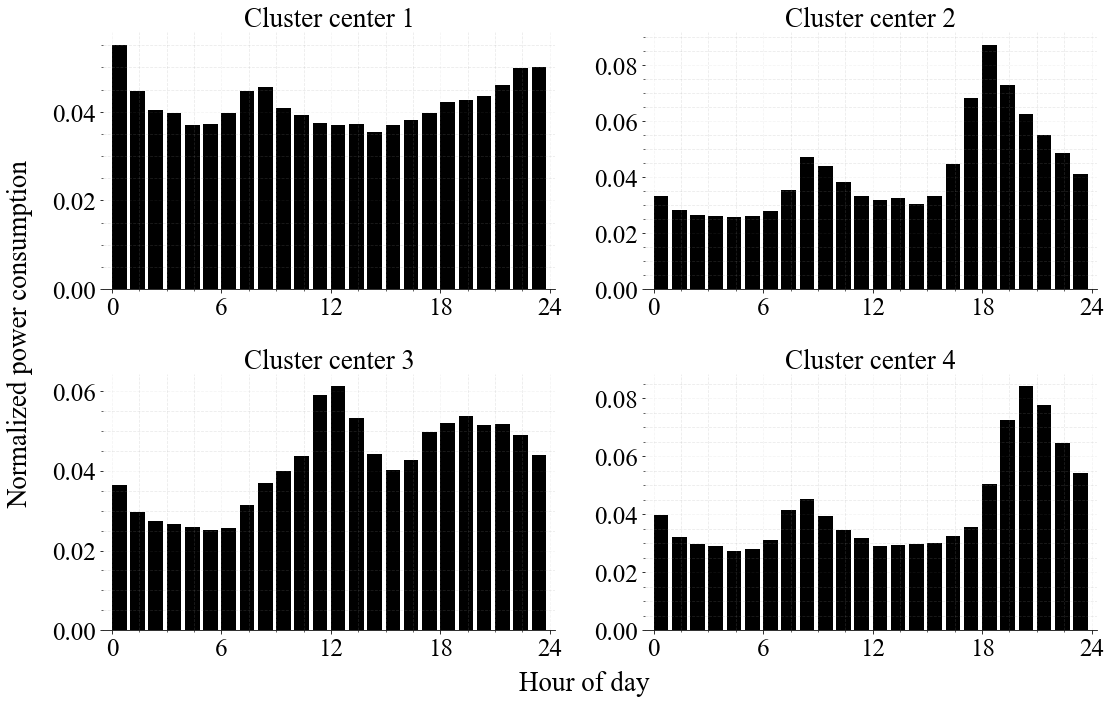

In [2]:
fig_width = 8.9
golden_mean = (np.sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches
fig, ax = plt.subplots(2, 2, figsize=(fig_width*2, fig_height*2))
fig.subplots_adjust(hspace=0.33)
rank = 0
overall_fontsize = 25
for row in cluster_sizes.iterrows():
    if rank < 4:
        cluster = row[1]['cluster']
        center = cluster_centers.loc[cluster_centers['cluster']==cluster].values[0]
        center = list(center[16:])+ list(center[1:16]) 
        row = int(rank/2)
        col = int(rank%2)
        ax[row, col].bar(list(range(0,24)), center, align='edge', color='black')
        ax[row, col].set_title('Cluster center '+ str(rank+1), fontsize=overall_fontsize+2)
        ax[row, col].tick_params(labelsize=overall_fontsize)
        ax[row, col].margins(x=0.02, tight = True)
        ax[row, col].spines['top'].set_visible(False)
        ax[row, col].spines['left'].set_visible(False)
        ax[row, col].spines['right'].set_visible(False)
        ax[row, col].grid(b=True, which='major', color='#999999', linestyle='--', alpha = 0.1)
        ax[row, col].minorticks_on()
        ax[row, col].grid(b=True, which='minor', color='#999999', linestyle='--', alpha=0.2)
        ax[row, col].xaxis.set_ticks([0,6,12,18,24])

#         print(center.values[0][1:])



        rank += 1
fig.text(0.5, 0.05, 'Hour of day', ha='center', fontsize=overall_fontsize+2)
fig.text(0.05, 0.5, 'Normalized power consumption', va='center', rotation='vertical', fontsize=overall_fontsize+2)
fig.show()
fig.savefig('../plots/clustering_results.pdf', bbox_inches='tight', format='pdf', dpi=1000)